In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import pingouin as pg
from numpy import std, mean, sqrt

In [2]:
#loading and cleaning the dataframe
df = pd.read_csv('Final_Dataset_for_Comp_1022.csv', encoding = 'unicode_escape', index_col = 0)
dfClean = df[['ID', 'Overall', 'Cohesion', 'Syntax', 'Vocabulary',
              'Phraseology', 'Grammar', 'Conventions', 'Source', 'Prompt_name', 
              'Task', 'Grade', 'ELL', 'Race_Ethnicity', 'Gender',
              'Student_disability_status', 'Economically_disadvantaged',
              'Essay_word_count']]

Index(['ID', 'Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology',
       'Grammar', 'Conventions', 'Source', 'Prompt_name', 'Task', 'Grade',
       'ELL', 'Race_Ethnicity', 'Gender', 'Student_disability_status',
       'Economically_disadvantaged', 'Essay_word_count'],
      dtype='object')


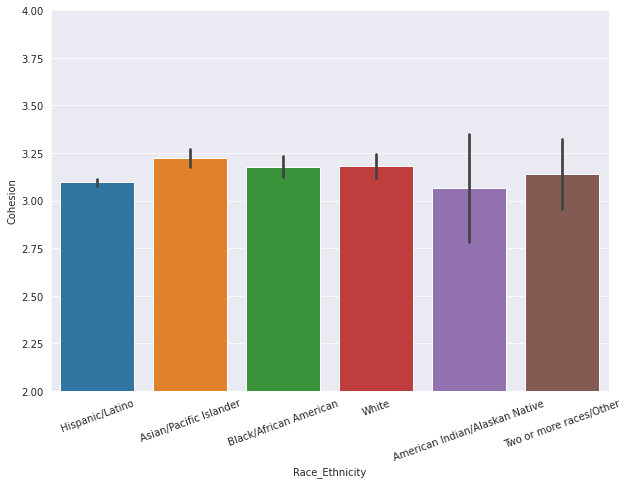

In [6]:
#graphing the variables
plt.figure(figsize=(10, 7))
sns.set_style("darkgrid")
print(dfClean.columns)
sns.barplot(data=dfClean, x='Race_Ethnicity', y='Cohesion')
plt.xticks(rotation=20)
plt.ylim(2,4)
plt.show()

In [12]:
# Descriptive Data - Takes two arguments - the first is the independent variable as a string, 
# the second is a list of dependent variables 
# Prints out descriptive data column by column to copy and paste into a table.

scores = ['Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology', 'Grammar', 'Conventions']

def descriptive(metav, scores):
    variables = pd.Series(dfClean[metav]).unique()
    header = ['variable', '']
    for score in scores:
        header.append(score)
    print(','.join(header))
    for variable in variables:
        print(variable)
        print(len(dfClean[dfClean[metav] == variable]))
        for score in scores:
            print(str(round(dfClean[dfClean[metav] == variable][score].mean(), 2)))
            print(str(round(dfClean[dfClean[metav] == variable][score].std(), 2)))
descriptive('Race_Ethnicity', scores)

variable,,Overall,Cohesion,Syntax,Vocabulary,Phraseology,Grammar,Conventions
Hispanic/Latino
4635
3.07
0.63
3.1
0.65
2.99
0.63
3.2
0.57
3.09
0.64
3.0
0.68
3.05
0.65
Asian/Pacific Islander
792
3.23
0.64
3.22
0.66
3.17
0.64
3.31
0.59
3.2
0.65
3.08
0.69
3.23
0.7
Black/African American
515
3.2
0.62
3.18
0.66
3.1
0.65
3.35
0.58
3.23
0.64
3.16
0.68
3.12
0.65
White
471
3.16
0.67
3.18
0.7
3.06
0.68
3.26
0.63
3.18
0.66
3.12
0.71
3.1
0.71
American Indian/Alaskan Native
23
3.09
0.6
3.07
0.7
3.0
0.5
3.17
0.51
3.04
0.75
3.0
0.72
3.0
0.56
Two or more races/Other
46
3.22
0.66
3.14
0.65
3.28
0.56
3.23
0.58
3.07
0.68
3.1
0.66
3.18
0.7


In [18]:
# Anova: takes the indepedent variable and the dependent variable as arguments, prints out output of the anova.
def anova(metavariable, score):
    aov = pg.anova(dv=score, between=metavariable, data=dfClean, detailed=True)
    f=round(int(aov['F'][0]), 0)
    df=(round(aov['DF'][0], 2))
    p=(round(aov['p-unc'][0], 3))
    eta=(round(aov['np2'][0], 3))
    print('f({}) = {}, p = {}, eta2 = {}'.format(df, f, p, eta))

In [10]:
# T-test: : takes the indepedent variable and the dependent variable as arguments, prints out output of the t-test.

# this is a function to calculate cohen's d
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

# this is a function to calculate degrees of freedom
def DF(x,y):
    return len(x)+len(y)-2

# this is the main function
def ttest(metavariable, score):
    variables = pd.Series(dfClean[metavariable].dropna().unique())
    x = dfClean[dfClean[metavariable] == variables[0]][score]
    y = dfClean[dfClean[metavariable] == variables[1]][score]
    stat = round(ttest_ind(x,y).statistic, 2)
    p = round(ttest_ind(x,y).pvalue, 3)
    d = round(cohen_d(x, y), 2)
    df = int(DF(x,y))
    print('t({}) = {}, p = {}, d = {}'.format(df, stat, p, d))
    
ttest('Gender', 'Overall')

t(6480) = -4.31, p = 0.0, d = -0.11


In [13]:
print(dfClean.columns)
descriptive('Economically_disadvantaged', scores)
anova('Grade', 'Overall')

Index(['ID', 'Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology',
       'Grammar', 'Conventions', 'Source', 'Prompt_name', 'Task', 'Grade',
       'ELL', 'Race_Ethnicity', 'Gender', 'Student_disability_status',
       'Economically_disadvantaged', 'Essay_word_count'],
      dtype='object')
variable,,Overall,Cohesion,Syntax,Vocabulary,Phraseology,Grammar,Conventions
Economically disadvantaged
4507
3.09
0.62
3.11
0.64
3.02
0.62
3.22
0.56
3.11
0.63
3.02
0.67
3.07
0.65
Not economically disadvantaged
1974
3.13
0.68
3.15
0.68
3.05
0.68
3.26
0.62
3.14
0.68
3.04
0.74
3.11
0.7
nan
0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
   Source           SS    DF        MS          F         p-unc       np2
0   Grade    22.527630     4  5.631907  13.983593  2.314473e-11  0.008562
1  Within  2608.618814  6477  0.402751        NaN           NaN       NaN
f(4) = 13, p = 0.0, eta2 = 0.009


In [14]:
#make long version
dfCleanLong = pd.melt(dfClean, id_vars = ['ID','Source', 'Prompt_name', 'Task', 'Grade',
       'ELL', 'Race_Ethnicity', 'Gender', 'Student_disability_status',
       'Economically_disadvantaged', 'Essay_word_count'], value_vars = ['Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology',
       'Grammar', 'Conventions'], var_name='test', value_name='score')
dfCleanLong.head()

,ID,Source,Prompt_name,Task,Grade,ELL,Race_Ethnicity,Gender,Student_disability_status,Economically_disadvantaged,Essay_word_count,test,score
0,2021000501,NCES,Cell phones at school,Independent,8,Yes,Hispanic/Latino,Male,Not identified as having disability,Economically disadvantaged,111,Overall,3.0
1,2021000535,NCES,Cell phones at school,Independent,8,Yes,Hispanic/Latino,Female,Not identified as having disability,Economically disadvantaged,99,Overall,3.0
2,2021000667,NCES,Cell phones at school,Independent,8,Yes,Hispanic/Latino,Female,Not identified as having disability,Economically disadvantaged,121,Overall,3.0
3,2021000683,NCES,Cell phones at school,Independent,8,Yes,Hispanic/Latino,Male,Not identified as having disability,Economically disadvantaged,182,Overall,3.0
4,2021000705,NCES,Cell phones at school,Independent,8,Yes,Hispanic/Latino,Female,Not identified as having disability,Not economically disadvantaged,192,Overall,3.0


<function matplotlib.pyplot.show(close=None, block=None)>

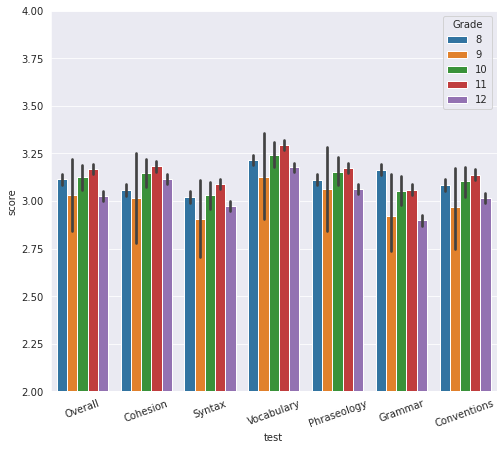

In [15]:
# Visualize the scores by variable

plt.figure(figsize=(8, 7))
plt.ylim(2,4)
sns.barplot(data=dfCleanLong, x='test', y='score', hue='Grade')
plt.xticks(rotation=20)
plt.show

In [19]:
#create anova output
scores = ['Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology',
       'Grammar', 'Conventions']

for score in scores:
    print(score)
    anova('Race_Ethnicity', score)

#     aov = pg.anova(dv=score, between='Race_Ethnicity', data=dfClean, detailed=True)
#     f=round(int(aov['F'][0]), 0)
#     df=(round(aov['DF'][0], 2))
#     p=(round(aov['p-unc'][0], 3))
#     eta=(round(aov['np2'][0], 3))
#     print('{},{},{},{}'.format(score,eta,f,p))

Overall
f(5) = 12, p = 0.0, eta2 = 0.01
Cohesion
f(5) = 6, p = 0.0, eta2 = 0.005
Syntax
f(5) = 14, p = 0.0, eta2 = 0.011
Vocabulary
f(5) = 9, p = 0.0, eta2 = 0.007
Phraseology
f(5) = 8, p = 0.0, eta2 = 0.007
Grammar
f(5) = 7, p = 0.0, eta2 = 0.006
Conventions
f(5) = 11, p = 0.0, eta2 = 0.008


In [21]:
#create ttest output
scores = ['Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology',
       'Grammar', 'Conventions']
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

def DF(x,y):
    return len(x)+len(y)-2

def ttestchart(metavariable, score):
    variables = pd.Series(dfClean[metavariable].dropna().unique())
    x = dfClean[dfClean[metavariable] == variables[0]][score]
    y = dfClean[dfClean[metavariable] == variables[1]][score]
    stat = round(ttest_ind(x,y).statistic, 2)
    p = round(ttest_ind(x,y).pvalue, 3)
    d = round(cohen_d(x, y), 2)
    df = int(DF(x,y))
    print('{},{},{},{}'.format(score, d, stat, p))

for score in scores:
    print(score)
    ttest('Economically_disadvantaged', score)

Overall
t(6479) = -2.39, p = 0.017, d = -0.06
Cohesion
t(6479) = -2.26, p = 0.024, d = -0.06
Syntax
t(6479) = -2.16, p = 0.031, d = -0.06
Vocabulary
t(6479) = -3.01, p = 0.003, d = -0.08
Phraseology
t(6479) = -2.02, p = 0.043, d = -0.05
Grammar
t(6479) = -1.05, p = 0.294, d = -0.03
Conventions
t(6479) = -2.11, p = 0.035, d = -0.06


In [ ]:
dfCleanLongCor = pd.melt(dfClean, id_vars = ['ID','Overall','Source', 'Prompt_name', 'Task', 'Grade',
       'ELL', 'Race_Ethnicity', 'Gender', 'Student_disability_status',
       'Economically_disadvantaged', 'Essay_word_count'], value_vars = ['Cohesion', 'Syntax', 'Vocabulary', 'Phraseology',
       'Grammar', 'Conventions'], var_name='test', value_name='score')
dfCleanLongCor.to_csv('ELLIPSEcor.csv')